In [2346]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

**Display Results Table**

In [2347]:
import plotly.graph_objs as go 

results_df =  pd.read_csv("data/fifaworldcup/results.csv")
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Display Team Rankings Table**

In [2348]:
rank_df = pd.read_csv('data/fifaworldranking/fifa_ranking-2022-10-06.csv')

rank_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


**Clean Ranking Data**

In [2349]:
rank_df["rank_date"] = pd.to_datetime(rank_df["rank_date"])
rank_df = rank_df[(rank_df["rank_date"] >= "2020-1-1")].reset_index(drop=True)

rank_df["country_full"] = rank_df["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

rank_df = rank_df.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

rank_df.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2020-02-20,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
1,2020-02-21,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
2,2020-02-22,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
3,2020-02-23,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
4,2020-02-24,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC


**Clean Results Data**

In [2350]:
results_df["date"] = pd.to_datetime(results_df["date"])

results_df = results_df[(results_df["date"] >= "2020-1-1")].reset_index(drop=True)
results_df.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2020-01-07,Barbados,Canada,1,4,Friendly,Irvine,United States,True
1,2020-01-09,Moldova,Sweden,0,1,Friendly,Doha,Qatar,True
2,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
3,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
4,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True


In [2351]:
ranking_df = pd.pivot_table(data = rank_df, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
ranking_df.head()

rank_date,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,...,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04
Albania,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,...,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1354.11
Algeria,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,...,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1489.10
American Samoa,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,...,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27
Andorra,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,...,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1035.20


In [2352]:
best_ranks = ranking_df.loc[ranking_df['2022-10-06'].sort_values(ascending = False)[:10].index]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns, 
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))
    
fig.update_layout(
    title="Evolution of the FIFA Ranking for today\'s 10 best teams",
    yaxis_title="Points"
)
fig.show()

Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

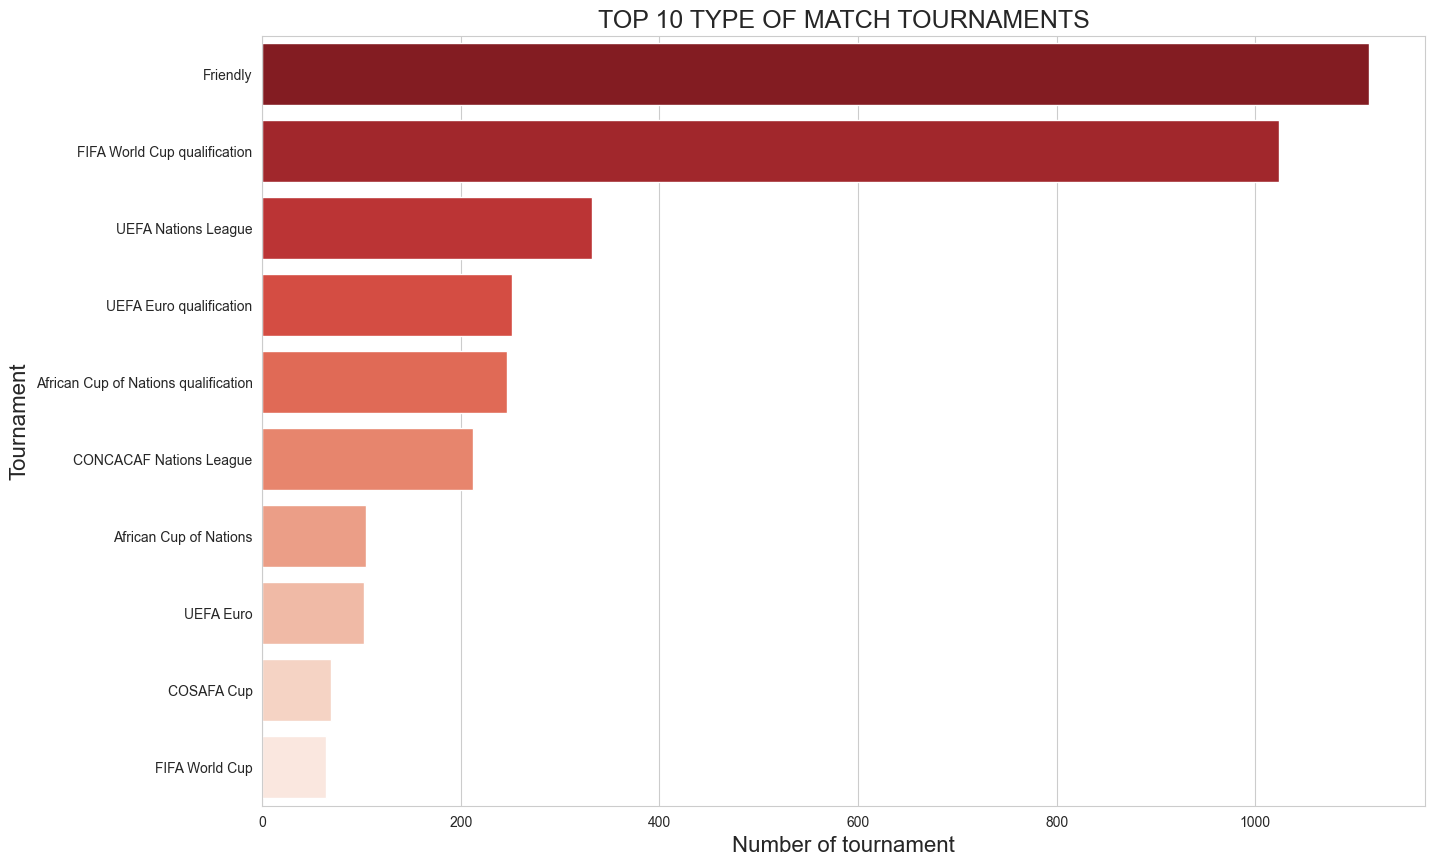

In [2353]:
tournament = results_df['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

In [2354]:
# create two dataframe for the home and away teams
home = results_df[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = results_df[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})

# merge it into one
# team_score = pd.concat([home, away], ignore_index=True)

# for home in away:
#     home.append(df)

# final_df = pd.concat(df_list)
team_score = pd.concat([home, away])

# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})

Text(0.5, 1.0, 'TOP 10 OF GOAL AVERAGE PER MATCH')

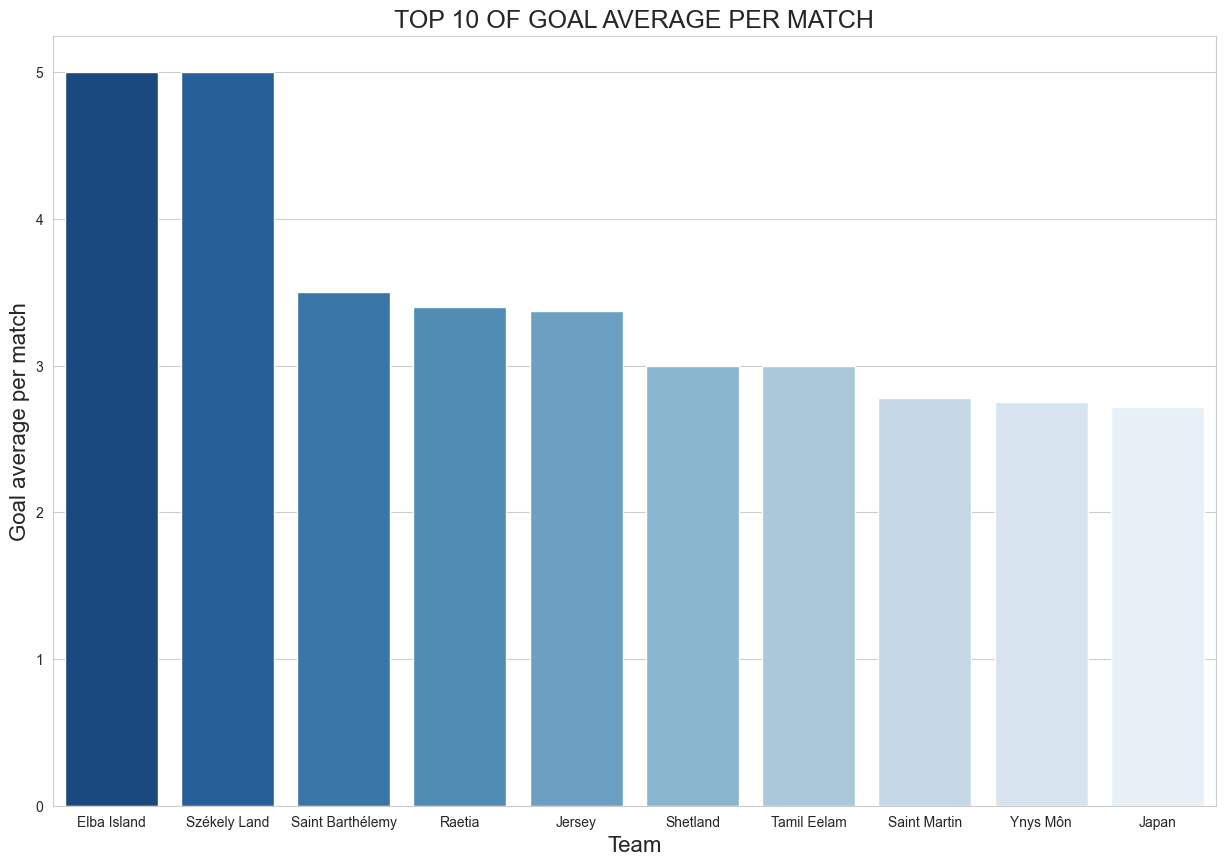

In [2355]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

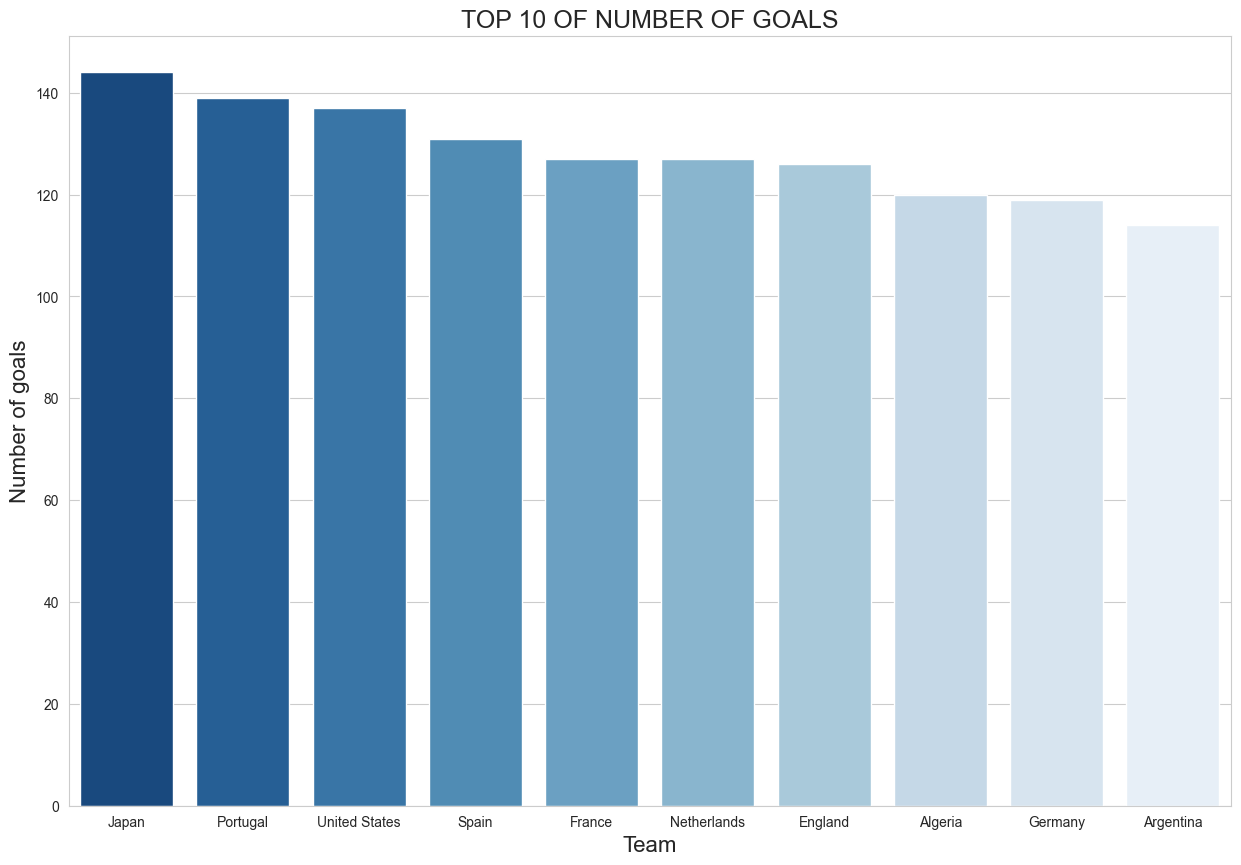

In [2356]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [2357]:
world_cup = pd.read_csv("data/international-football-results-from-1872-to-2017/Fifa_Worldcup_2022_Groups.csv")


world_cup.head()

,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales


In [2358]:
world_cup.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [2359]:
world_cup = world_cup.replace({
                               "Korea Republic" : "South Korea","USA": "United States"})
world_cup = world_cup.set_index('Team')
world_cup.head()

,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [2360]:
#Join Ranking with match 
results_df = results_df.merge(rank_df,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])
# matches.head()

results_df = results_df.merge(rank_df, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], suffixes=('_home', '_away')) 
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,0.0,UEFA,2020-09-03,8.0,Spain,ESP,1636.0,1636.0,0.0,UEFA
1,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,0.0,UEFA,2020-09-03,12.0,Switzerland,SUI,1608.0,1608.0,0.0,UEFA
2,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,0.0,UEFA,2020-09-03,29.0,Serbia,SRB,1494.0,1494.0,0.0,UEFA
3,2020-09-03,Turkey,Hungary,0,1,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,0.0,UEFA,2020-09-03,52.0,Hungary,HUN,1416.0,1416.0,0.0,UEFA
4,2020-09-03,Bulgaria,Republic of Ireland,1,1,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,0.0,UEFA,2020-09-03,34.0,Republic of Ireland,IRL,1486.0,1486.0,0.0,UEFA


<Axes: >

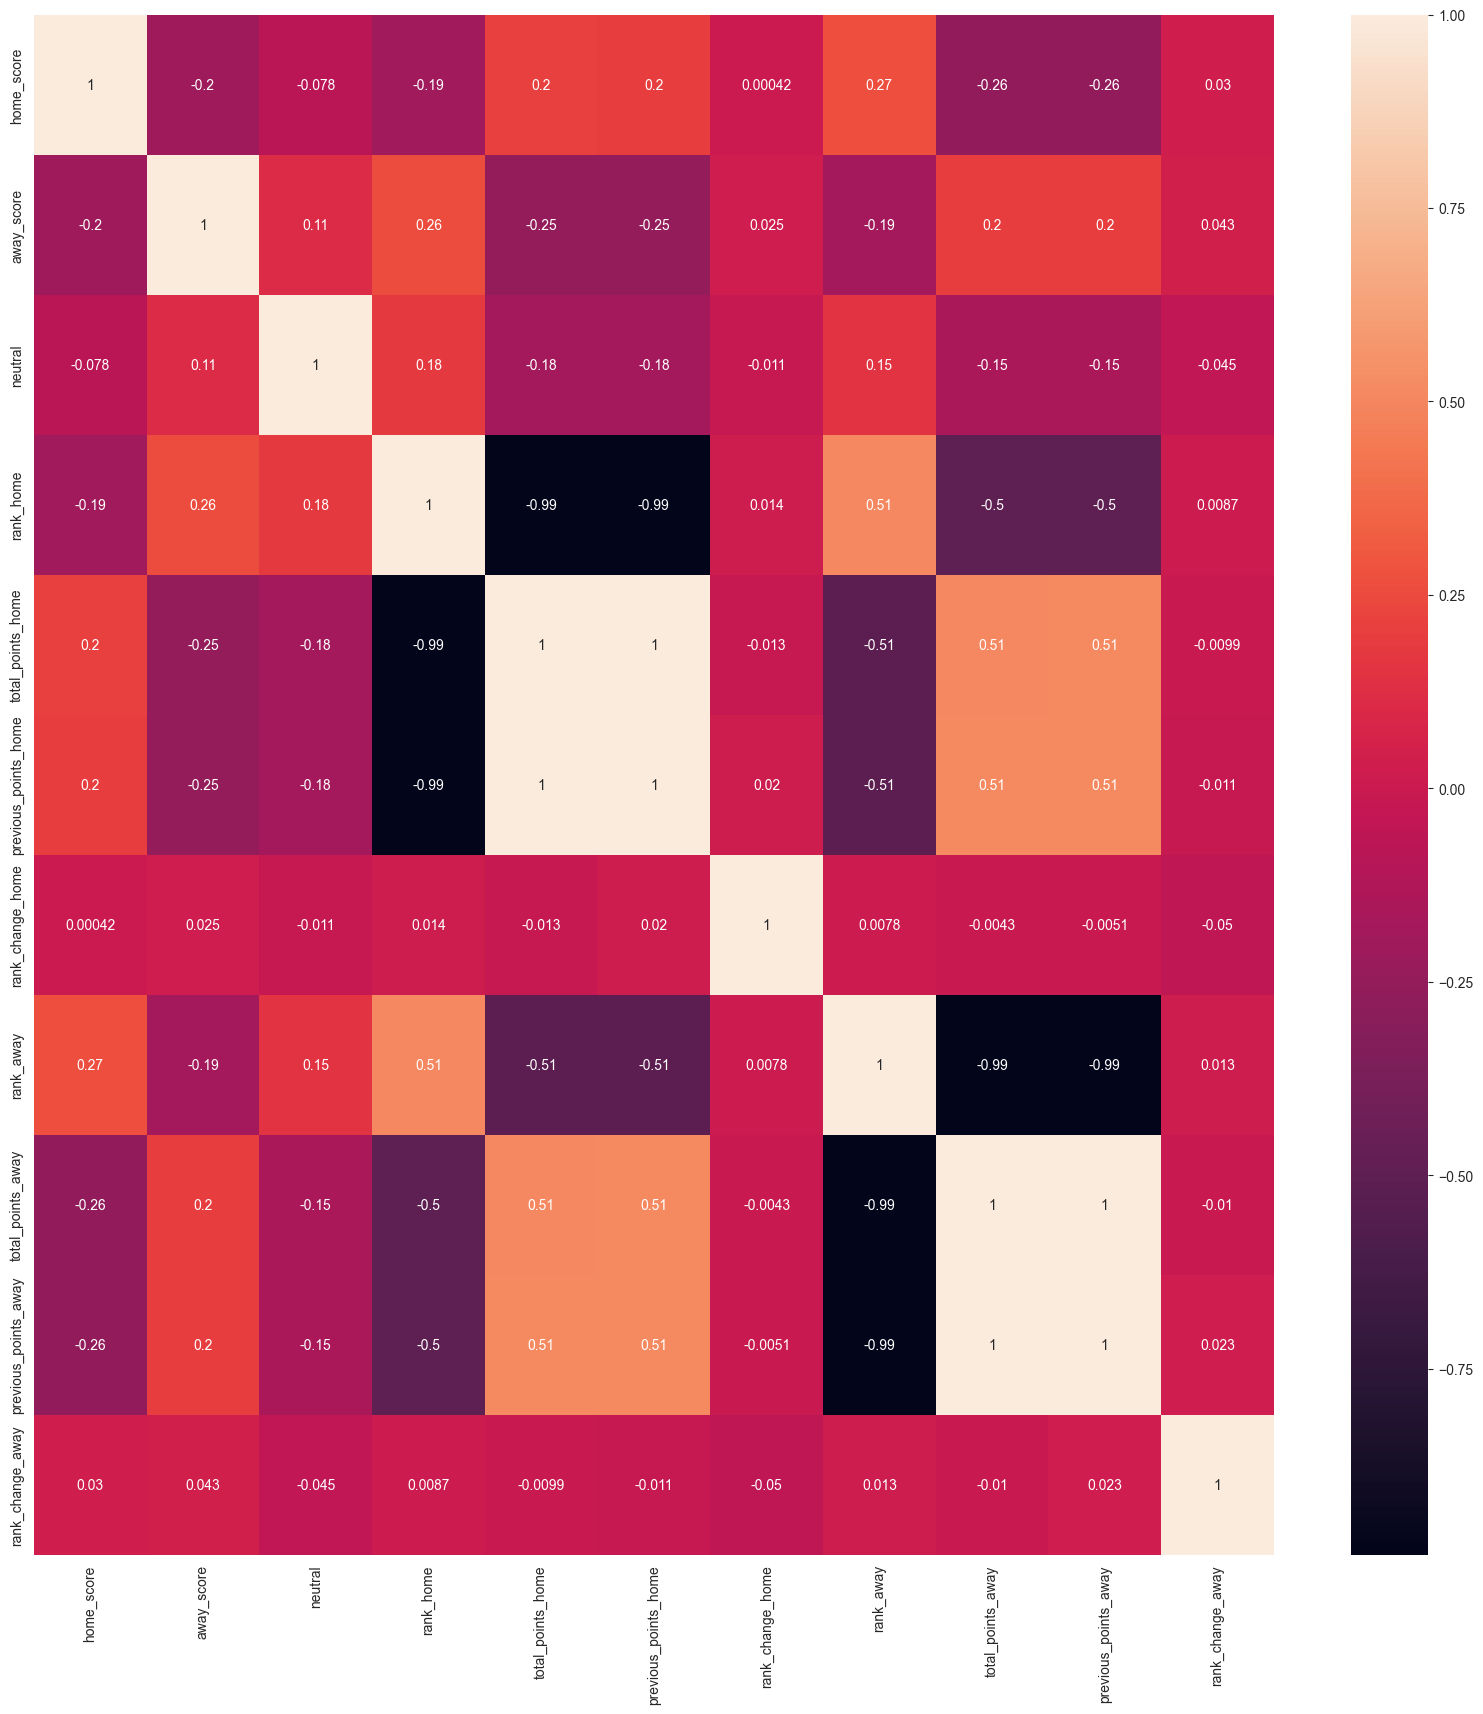

In [2361]:
results_df.head()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = results_df.corr(numeric_only=True)
corr1
sns.heatmap(corr1,annot=True)

In [2362]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away'],
      dtype='object')

In [2363]:
results_df['rank_difference'] = results_df['rank_home'] - results_df['rank_away']
results_df['average_rank'] = (results_df['rank_home'] + results_df['rank_away'])/2
results_df['point_difference'] = results_df['total_points_home'] - results_df['total_points_away']
results_df['score_difference'] = results_df['home_score'] - results_df['away_score']
results_df['is_won'] = results_df['score_difference'] > 0 
results_df['is_stake'] = results_df['tournament'] != 'Friendly'



In [2364]:
results_df['wc_participant'] = results_df['home_team'] * results_df['home_team'].isin(world_cup.index.tolist())
results_df['wc_participant'] = results_df['wc_participant'].replace({'':'Other'})
results_df = results_df.join(pd.get_dummies(results_df['wc_participant']))

In [2365]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
1,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
2,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
3,2020-09-03,Turkey,Hungary,0,1,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
4,2020-09-03,Bulgaria,Republic of Ireland,1,1,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False


In [2366]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won', 'is_stake', 'wc_participant', 'Argentina',
       'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'Costa Rica',
       'Croatia', 'Denmark', 'Ecuador', 'England', 'France', 'Germany',
       'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands', 'Other',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'United States',
       

In [2367]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2368]:
X, y = results_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], results_df['is_won']
print(X)
print(y)

      average_rank  rank_difference  point_difference  is_stake
0             11.5              7.0            -34.00      True
1             18.0             12.0            -71.00      True
2             33.5              9.0            -24.00      True
3             40.5            -23.0             78.00      True
4             46.5             25.0           -105.00      True
...            ...              ...               ...       ...
2058          30.5             11.0            -60.96      True
2059          42.5            -45.0            190.96      True
2060         107.0             -2.0              3.38      True
2061          53.5             -9.0             42.35      True
2062         150.0             26.0            -99.19      True

[2063 rows x 4 columns]
0       False
1        True
2        True
3       False
4       False
        ...  
2058    False
2059    False
2060     True
2061     True
2062     True
Name: is_won, Length: 2063, dtype: bool


In [2369]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [2370]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [2371]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test) 
    prob_test = model.predict(X_test) 
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
        
    cm = confusion_matrix(y_test, prob_test, labels=model.classes_)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='all')
    # disp.plot()
    plt.show()
    return model, accuracy, roc_auc, coh_kap, time_taken

def run_model_no_plot(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0

    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.7046004842615012
ROC Area under Curve = 0.7039739612709155
Cohen's Kappa = 0.4079479225418312
Time taken = 0.0050122737884521484
              precision    recall  f1-score   support

       False    0.71759   0.71759   0.71759       216
        True    0.69036   0.69036   0.69036       197

    accuracy                        0.70460       413
   macro avg    0.70397   0.70397   0.70397       413
weighted avg    0.70460   0.70460   0.70460       413



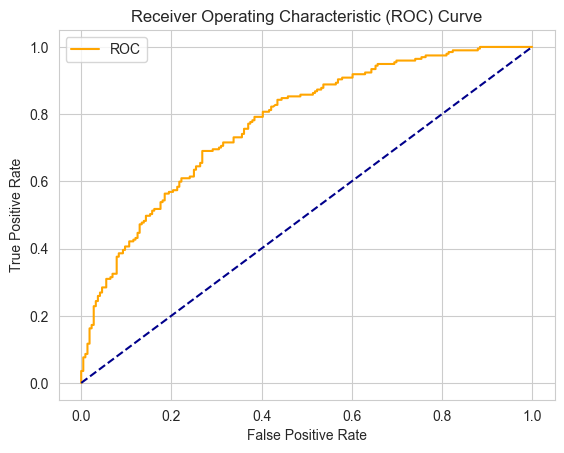

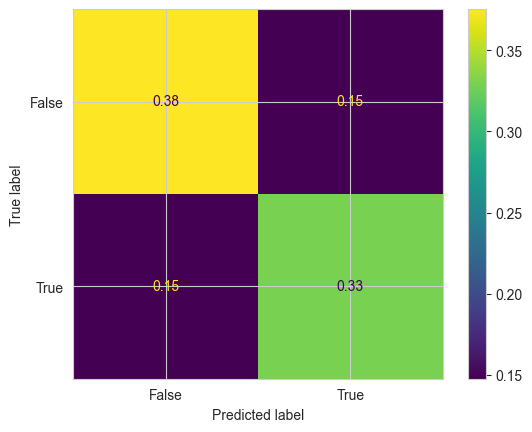

In [2372]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.6585956416464891
ROC Area under Curve = 0.652401767249483
Cohen's Kappa = 0.308174830408801
Time taken = 0.004415988922119141
              precision    recall  f1-score   support

       False    0.64151   0.78704   0.70686       216
        True    0.68919   0.51777   0.59130       197

    accuracy                        0.65860       413
   macro avg    0.66535   0.65240   0.64908       413
weighted avg    0.66425   0.65860   0.65174       413



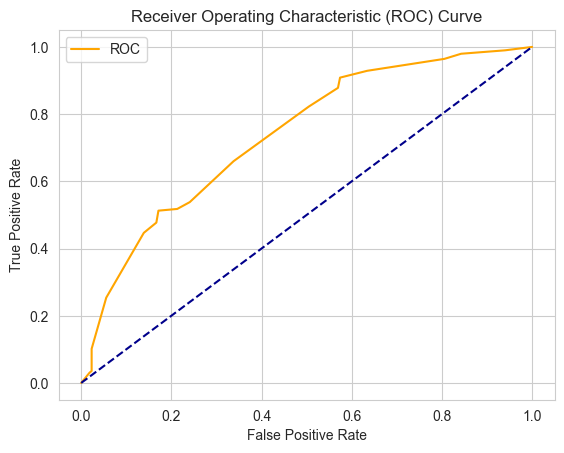

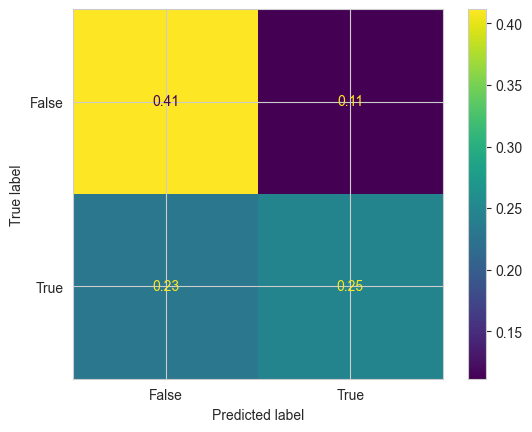

In [2373]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 5,
             'max_features': "log2"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.7021791767554479
ROC Area under Curve = 0.6996498401955255
Cohen's Kappa = 0.4008209386537077
Time taken = 0.2886662483215332
              precision    recall  f1-score   support

       False    0.69957   0.75463   0.72606       216
        True    0.70556   0.64467   0.67374       197

    accuracy                        0.70218       413
   macro avg    0.70256   0.69965   0.69990       413
weighted avg    0.70243   0.70218   0.70110       413



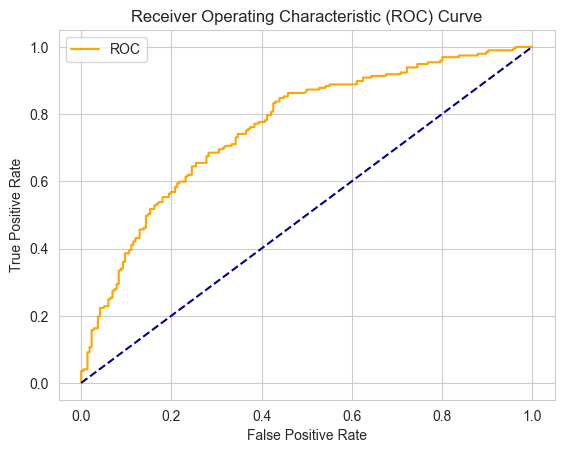

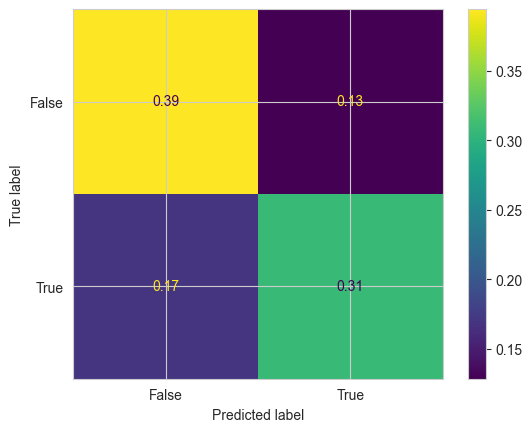

In [2374]:

svm_clf  = SVC(kernel='rbf', gamma='scale', C=16,probability=True,)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(svm_clf, X_train, y_train, X_test, y_test)

Accuracy = 0.6997578692493946
ROC Area under Curve = 0.6977815378830606
Cohen's Kappa = 0.39662566567698765
Time taken = 0.7657654285430908
              precision    recall  f1-score   support

       False    0.70175   0.74074   0.72072       216
        True    0.69730   0.65482   0.67539       197

    accuracy                        0.69976       413
   macro avg    0.69953   0.69778   0.69806       413
weighted avg    0.69963   0.69976   0.69910       413



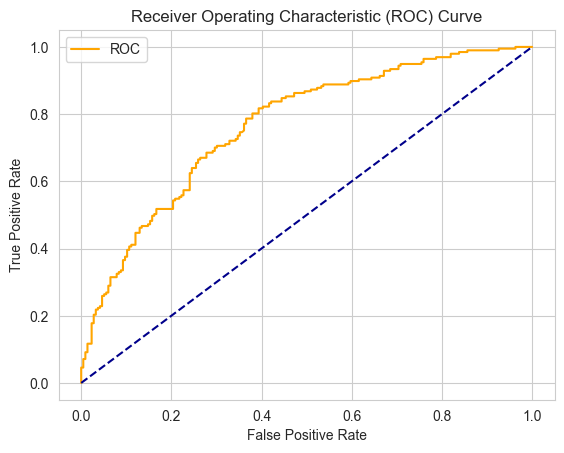

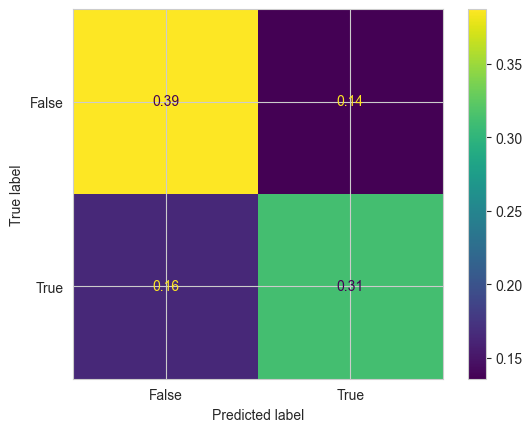

In [2375]:
from sklearn.neural_network import MLPClassifier

def run_neural_network(params_nn):
    model_nn = MLPClassifier(**params_nn)
    model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model_no_plot(model_nn, X_train, y_train, X_test, y_test)
    return accuracy_nn
params_nn = {'hidden_layer_sizes': (100, 10),
            'activation': 'logistic',
            'solver': 'adam',
            'max_iter': 200}
model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)


In [2376]:
def multi_test(param_change_array):
    for i in range(len(param_change_array)):
        running_accuracy_sum = 0
        trials = 25
        for j in range(trials):
            params_nn = {'hidden_layer_sizes': param_change_array[i],
                        'activation': 'logistic',
                        'solver': 'adam',
                        'max_iter': 200}
            running_accuracy_sum += run_neural_network(params_nn)
        avg_acc = running_accuracy_sum / trials
        print(f'param_index: {i}, avg_acc: {avg_acc}')

hidden_layer_sizes = [
    (30,),
    (100, 100, 100)
]
# multi_test(hidden_layer_sizes)
# (30,30,30)

In [2377]:

# for i in range(100, 1000, 100):
#     running_accuracy_sum = 0
#     trials = 20
#     for j in range(trials):
#         params_nn = {'hidden_layer_sizes': (30,30,30),
#                     'activation': 'logistic',
#                     'solver': 'adam',
#                     'max_iter': i}
#         running_accuracy_sum += run_neural_network(params_nn)
#     avg_acc = running_accuracy_sum / trials
#     print(f'max_iter: {i}, avg_acc: {avg_acc}')
    

Accuracy = 0.6464891041162227
ROC Area under Curve = 0.6455160744500847
Cohen's Kappa = 0.2911621564432323
Time taken = 0.18520092964172363
              precision    recall  f1-score   support

       False    0.66055   0.66667   0.66359       216
        True    0.63077   0.62437   0.62755       197

    accuracy                        0.64649       413
   macro avg    0.64566   0.64552   0.64557       413
weighted avg    0.64634   0.64649   0.64640       413



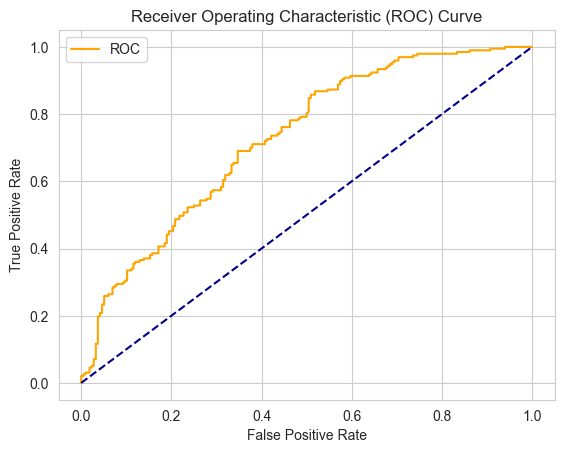

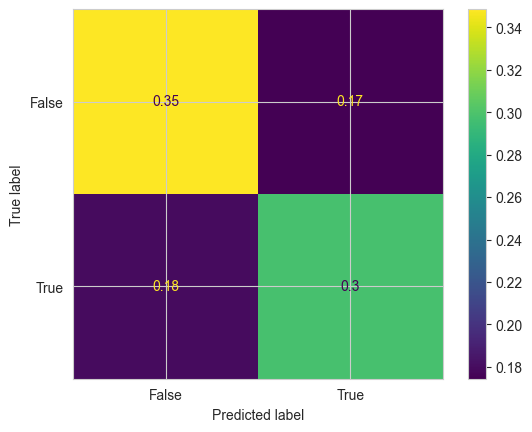

In [2378]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 796, number of negative: 854
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482424 -> initscore=-0.070332
[LightGBM] [Info] Start training from score -0.070332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


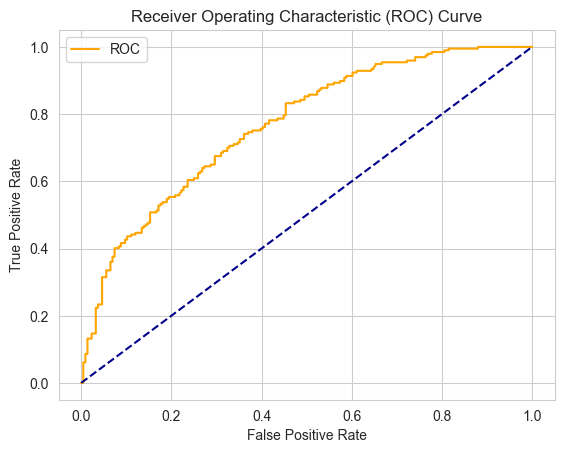

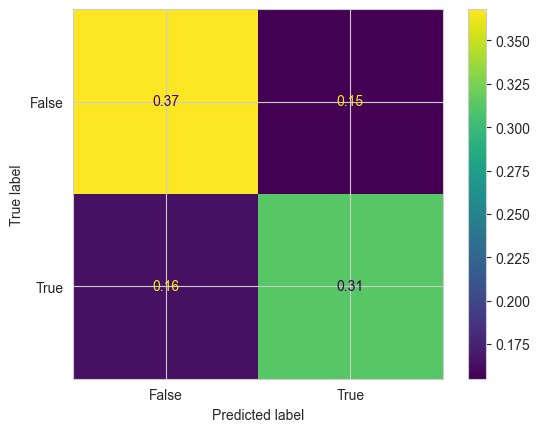

In [2379]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb, force_col_wise='true')
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.6682808716707022
ROC Area under Curve = 0.6688052265463433
Cohen's Kappa = 0.3367833741633749
Time taken = 1.2873148918151855
              precision    recall  f1-score   support

       False    0.69268   0.65741   0.67458       216
        True    0.64423   0.68020   0.66173       197

    accuracy                        0.66828       413
   macro avg    0.66846   0.66881   0.66816       413
weighted avg    0.66957   0.66828   0.66845       413



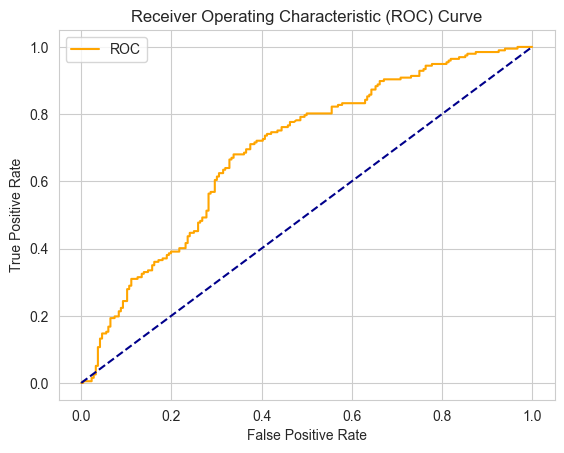

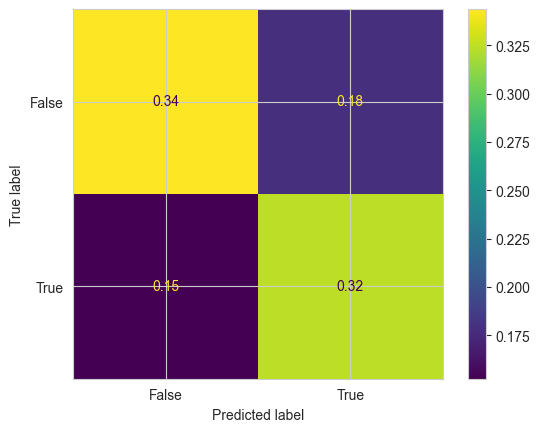

In [2380]:
import xgboost as xgb
params_xgb ={'n_estimators': 1000,
            'max_depth': 128}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [2381]:
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rank_df.loc[(rank_df['rank_date'] == rank_df['rank_date'].max()) & 
                                    rank_df['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

In [2382]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group D:___
France vs. Denmark: France wins with 0.56
France vs. Tunisia: France wins with 0.77
France vs. Australia: France wins with 0.78
Denmark vs. Tunisia: Denmark wins with 0.65
Denmark vs. Australia: Denmark wins with 0.67
Tunisia vs. Australia: Australia wins with 0.56
___Starting group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.84
Argentina vs. Mexico: Argentina wins with 0.61
Argentina vs. Poland: Argentina wins with 0.74
Saudi Arabia vs. Mexico: Mexico wins with 0.82
Saudi Arabia vs. Poland: Poland wins with 0.72
Mexico vs. Poland: Mexico wins with 0.56
___Starting group A:___
Qatar vs. Ecuador: Ecuador wins with 0.61
Qatar vs. Senegal: Senegal wins with 0.76
Qatar vs. Netherlands: Netherlands wins with 0.86
Ecuador vs. Senegal: Senegal wins with 0.73
Ecuador vs. Netherlands: Netherlands wins with 0.85
Senegal vs. Netherlands: Netherlands wins with 0.74
___Starting group B:___
England vs. Iran: England wins with 0.66
England vs. United States: Englan

In [2383]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        if model_lr.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Uruguay vs. Switzerland: Switzerland wins with probability 0.59
Belgium vs. Germany: Belgium wins with probability 0.67
France vs. Mexico: France wins with probability 0.59
England vs. Senegal: England wins with probability 0.63
Portugal vs. Brazil: Brazil wins with probability 0.81
Croatia vs. Spain: Spain wins with probability 0.69
Denmark vs. Argentina: Argentina wins with probability 0.74
United States vs. Netherlands: Netherlands wins with probability 0.68


___Starting of the quarterfinal___
Switzerland vs. Belgium: Belgium wins with probability 0.82
France vs. England: England wins with probability 0.54
Brazil vs. Spain: Brazil wins with probability 0.61
Argentina vs. Netherlands: Argentina wins with probability 0.53


___Starting of the semifinal___
Belgium vs. England: Belgium wins with probability 0.55
Brazil vs. Argentina: Brazil wins with probability 0.52


___Starting of the final___
Belgium vs. Brazil: Brazil wins with probability 0.63




In [2384]:
next_round_wc = world_cup.groupby('Group').nth([0, 1]) 
teams_through = next_round_wc['Team']

In [2385]:
teams_through

0           Uruguay
1          Portugal
4            Brazil
5       Switzerland
8           Belgium
9           Croatia
12            Spain
13          Germany
16           France
17          Denmark
20        Argentina
21           Mexico
24          England
25    United States
28      Netherlands
29          Senegal
Name: Team, dtype: object

In [2386]:
# import networkx as nx
# import pydot
# from networkx.drawing.nx_pydot import graphviz_layout

# node_sizes = pd.DataFrame(list(reversed(odds)))
# scale_factor = 0.3 # for visualization
# G = nx.balanced_tree(2, 3)
# pos = graphviz_layout(G, prog='twopi')
# centre = pd.DataFrame(pos).mean(axis=1).mean()

# plt.figure(figsize=(10, 10))
# ax = plt.subplot(1,1,1)
# # add circles 
# circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
# [ax.add_artist(plt.Circle((centre, centre), 
#                           cp, color='grey', 
#                           alpha=0.2)) for cp, c in circle_positions]

# # draw first the graph
# nx.draw(G, pos, 
#         node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
#         node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
#         alpha=1, 
#         cmap='Reds',
#         edge_color='black',
#         width=10,
#         with_labels=False)

# # draw the custom node labels
# shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
# nx.draw_networkx_labels(G, 
#                         pos=shifted_pos, 
#                         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
#                         labels=dict(zip(reversed(range(len(labels))), labels)))

# texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
# [plt.text(p, centre+20, t, 
#           fontsize=12, color='grey', 
#           va='center', ha='center') for p,t,c in texts]
# plt.axis('equal')
# plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
# plt.show()